#### Izhikevich Neuron Model
Solved using Forward Euler's model
        

In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defining the Izhikevich Neuron model
def izhikevich_model(a, b, c, d, I_in, tmax, dt, use_ramp_I=False):
    # Defining required arrays
    t = np.arange(0, tmax, dt)
    u = np.zeros(len(t))
    v = np.zeros(len(t))
    u[0] = -14 # Membrane Recovery Variable
    v[0] = -65 # Membrane Potential
    spike_thresh = 35

    # Generate the input current array
    if use_ramp_I:
        I = np.concatenate(
                (np.zeros(int(len(t)*0.1)), 
                np.linspace(0, 1, int(len(t)*0.8))*I_in, 
                np.zeros(int(len(t)*0.1)))
            )
    else:
        I = np.concatenate(
                (np.zeros(int(len(t)*0.1)), 
                np.ones(int(len(t)*0.8))*I_in, 
                np.zeros(int(len(t)*0.1)))
            )
    
    # Forward Euler method to solve the differential equations
    for i in range(len(t)-1):
        if v[i] >= spike_thresh:
            v[i] = spike_thresh
            v[i+1] = c
            u[i+1] = u[i] + d
        else:
            v[i+1] = v[i] + (0.04*v[i]**2 + 5*v[i] + 140 - u[i] + I[i])*dt
            u[i+1] = u[i] + (a*(b*v[i] - u[i]))*dt  

    plt.figure(figsize=(17,4))
    plt.plot(t, v, label='Membrane Potential')
    plt.plot(t, I, label='Applied Current')
    plt.plot(t, u, label='Recovery variable')
    plt.xlabel("Time (msec)")
    plt.grid()
    plt.legend()
    plt.show()


### Effect of Parameters
**a** and **b**
- **a** 0.002 - 0.07
- **b** 0.12 - 0.25
- increase in **a** or **b** will increase spike frequency
- **a** > 0.07 eliminates spike frequency adaptation
- Decrease in any to very low values results in Phasic Spiking

**c** and **d**
- **c** -55 - -75 mV
- **d** 2 - 12
- Increase in **c** starts creating bursts
- Reduction in **d** increases frequency of bursts


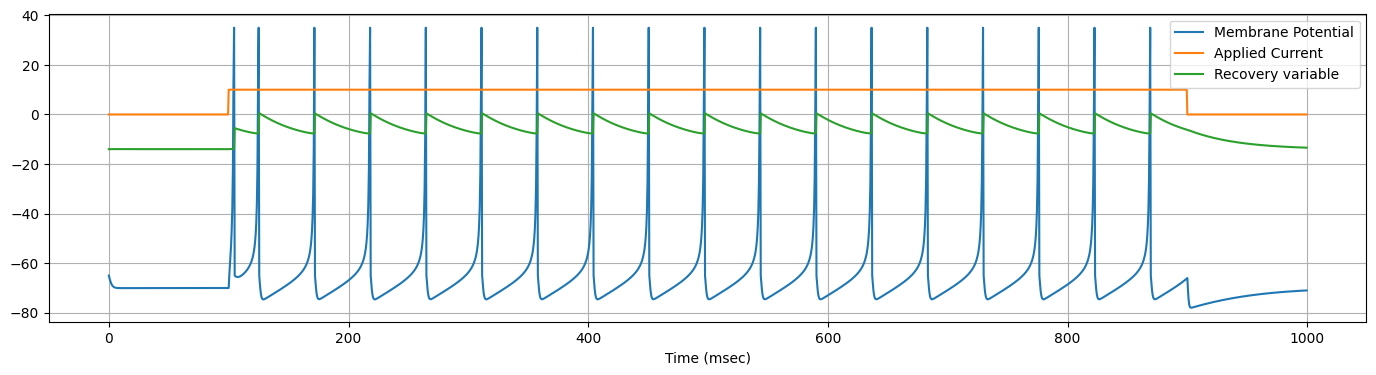

In [3]:
# Regular Spiking Type-II

izhikevich_model(a=0.02, b=0.2, c=-65, d=8, I_in=10, tmax=1000, dt=0.5)

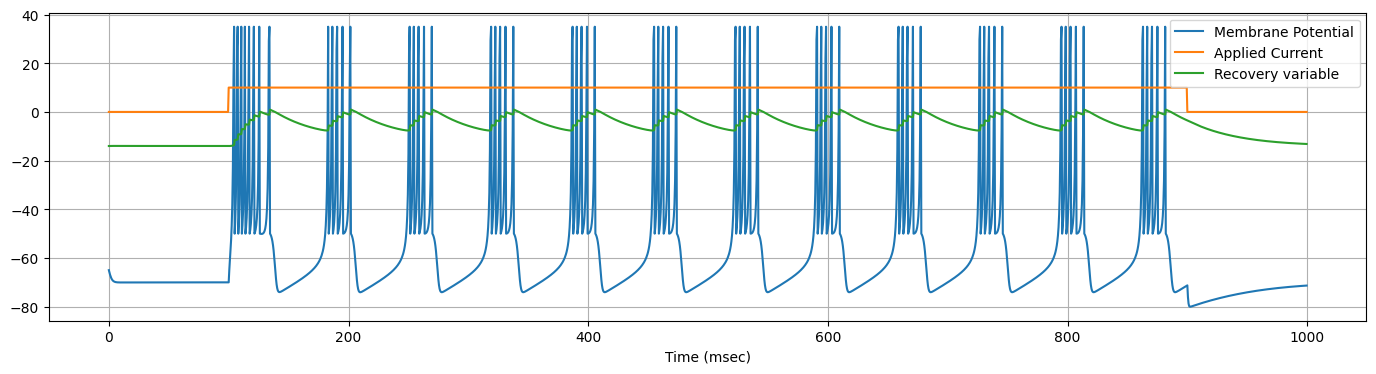

In [4]:
# Regular Bursting

izhikevich_model(a=0.02, b=0.2, c=-50, d=2, I_in=10, tmax=1000, dt=0.5)

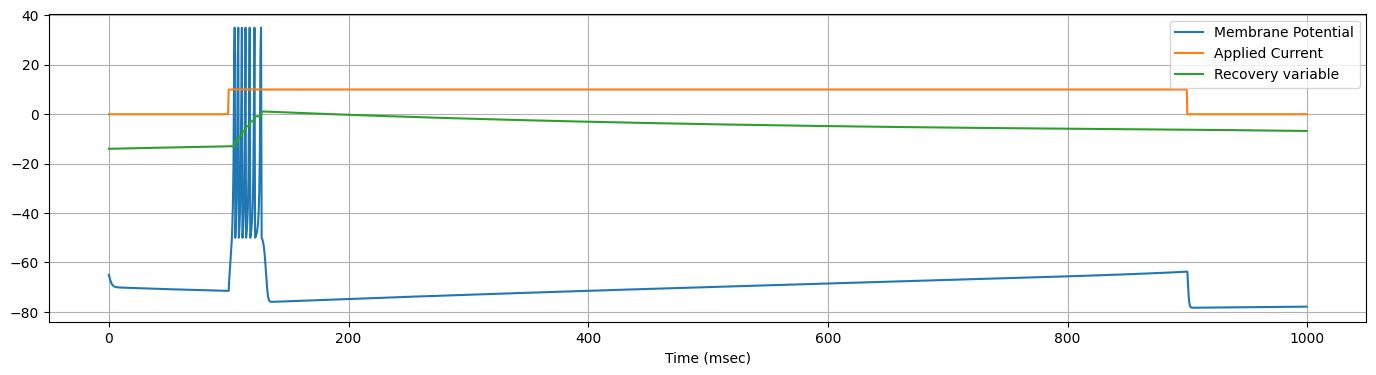

In [5]:
# Phasic Bursting 

izhikevich_model(a=0.002, b=0.12, c=-50, d=2, I_in=10, tmax=1000, dt=0.5)

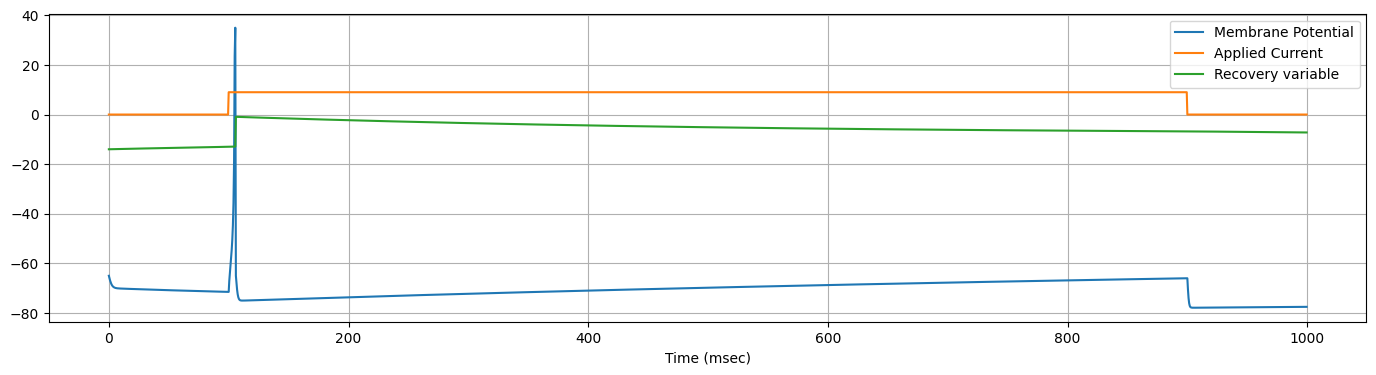

In [6]:
# Phasic Spiking 

izhikevich_model(a=0.002, b=0.12, c=-65, d=12, I_in=9, tmax=1000, dt=0.5)

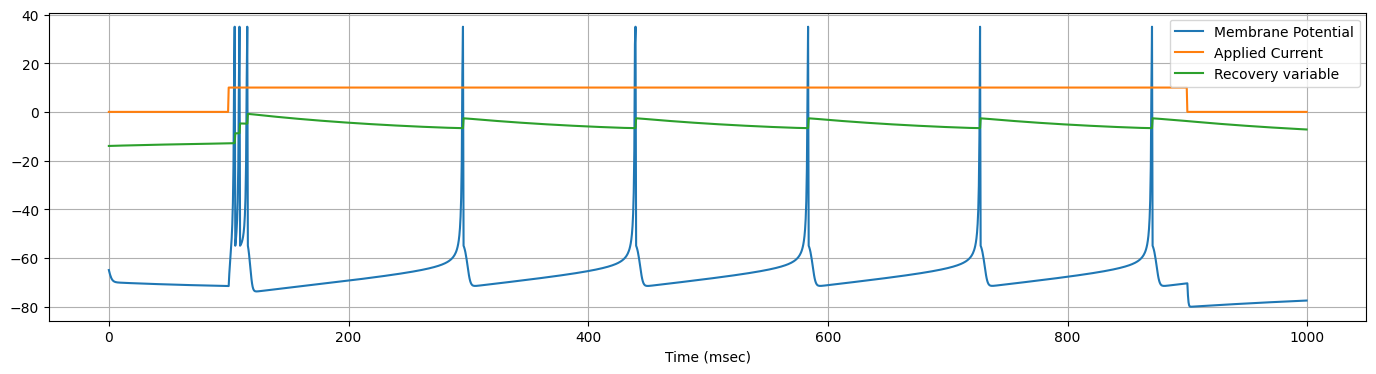

In [7]:
# Mixed Mode

izhikevich_model(a=0.005, b=0.16, c=-55, d=4, I_in=10, tmax=1000, dt=0.5)

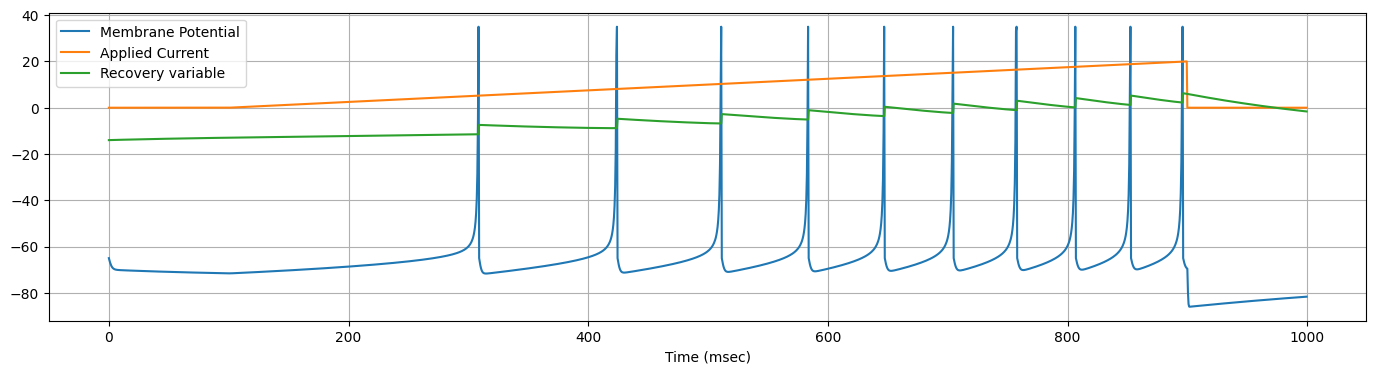

In [8]:
# Class I Excitable 

izhikevich_model(a=0.005, b=0.16, c=-65, d=4, I_in=20, tmax=1000, dt=0.5, use_ramp_I=True)